# Deep Neural Networks
You should build an end-to-end machine learning pipeline using a deep learning model. In particular, you should do the following:
- Load the `fashion mnist` dataset from [TensorFlow](https://www.tensorflow.org/tutorials/keras/classification). The loaded dataset is already split into training and test sets.
- Build an end-to-end machine learning pipeline, including a [deep learning](https://www.tensorflow.org/tutorials/keras/classification) model.
- Optimize your pipeline by validating your design decisions.
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


Load and Preprocess the Data

In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images,
    train_labels,
    test_size=0.2,
    random_state=42
)

# Normalize pixel values between 0 and 1
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

print(f"Training images: {train_images.shape}")
print(f"Validation images: {val_images.shape}")
print(f"Test images: {test_images.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images: (48000, 28, 28)
Validation images: (12000, 28, 28)
Test images: (10000, 28, 28)


Build the Deep Learning Model

In [3]:
def build_deep_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

model = build_deep_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

we need to do expermental result to justify why our seleceted model is the best, to do so we have to do and go through many process such as adjusting parameters and see the diffirent, or the effect of backpropagation...ect


Train and Validate the Model

In [4]:
EPOCHS = 20
BATCH_SIZE = 64

history = model.fit(
    train_images,
    train_labels,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(val_images, val_labels)
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7218 - loss: 0.7852 - val_accuracy: 0.8441 - val_loss: 0.4225
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8416 - loss: 0.4378 - val_accuracy: 0.8600 - val_loss: 0.3739
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8507 - loss: 0.4037 - val_accuracy: 0.8705 - val_loss: 0.3592
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8626 - loss: 0.3747 - val_accuracy: 0.8712 - val_loss: 0.3550
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8716 - loss: 0.3518 - val_accuracy: 0.8784 - val_loss: 0.3379
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8731 - loss: 0.3434 - val_accuracy: 0.8773 - val_loss: 0.3329
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8813 - loss: 0.3212 - val_accuracy: 0.8772 - val_loss: 0.3332
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8816 - loss: 0.3199 - val_accuracy:

Define the Plotting Function

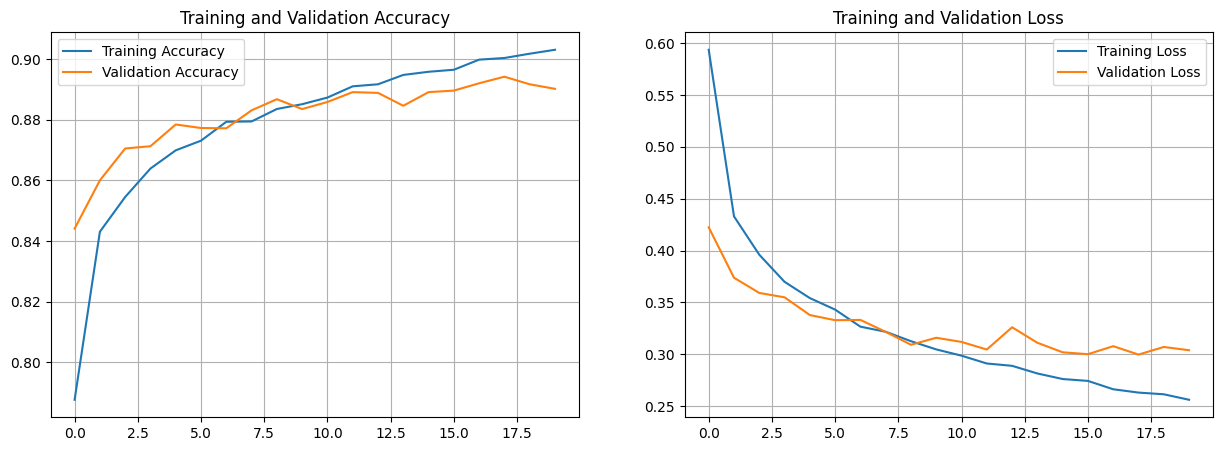

In [5]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Training and Validation Accuracy')
    ax1.legend()
    ax1.grid(True)

    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Training and Validation Loss')
    ax2.legend()
    ax2.grid(True)

    plt.show()

plot_history(history)

Test the Model on the Test Set

In [6]:
print("Evaluating model on the test dataset...")
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(f'\nTest accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

Evaluating model on the test dataset...
313/313 - 1s - 3ms/step - accuracy: 0.8865 - loss: 0.3273

Test accuracy: 0.8865
Test loss: 0.3273


Report Detailed Evaluation Metrics

In [9]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("\n Classification Report")
print(classification_report(test_labels, predicted_labels, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

 Classification Report
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.87      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.76      0.83      0.80      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.78      0.81      0.80      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.78      0.62      0.70      1000
     Sneaker       0.96      0.95      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000




 Confusion Matrix 


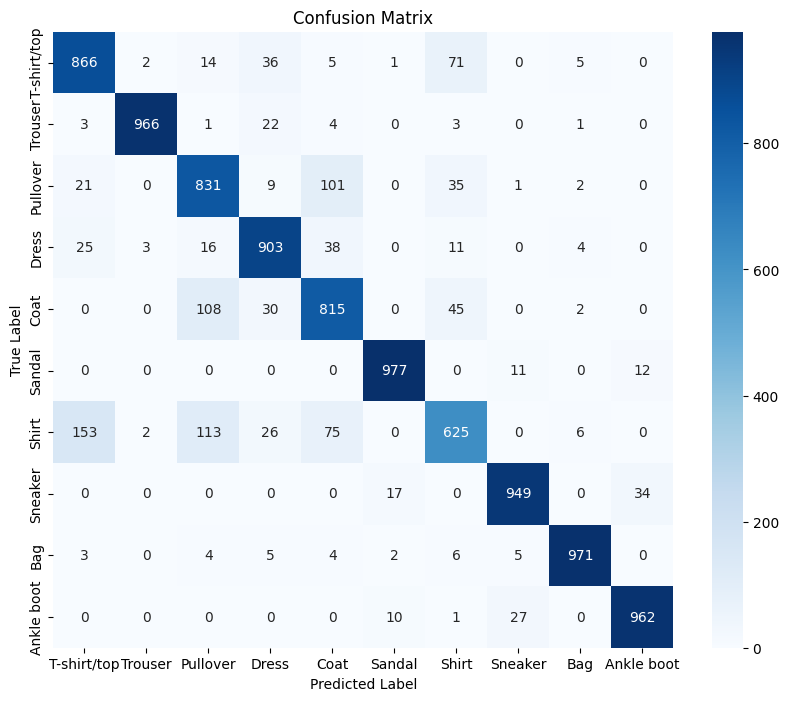

In [10]:
print("\n Confusion Matrix ")
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()